* Emissivity (ph/MeV/cm^2/s/sr/bin-z) as a function of redshift and Observed Energy (MeV)
* First line are Energies in MeV 
* First element of each subsequent line is the REDSHIFT

Emin: 	0.0001074077 TeV
redshift	 Emax (TeV)
0.001168203  	107.4077
0.001561193  	107.4077
0.002086388  	107.4077
0.002788261  	107.4077
0.003726248  	107.4077
0.00497978  	107.4077
0.006655007  	107.4077
0.008893791  	107.4077
0.01188571  	107.4077
0.01588414  	107.4077
0.02122766  	107.4077
0.02836876  	107.4077
0.03791218  	107.4077
0.05066606  	107.4077
0.06771043  	107.4077
0.09048861  	107.4077
0.1209295  	107.4077
0.1616109  	107.4077
0.2159778  	107.4077
0.288634  	107.4077
0.3857321  	61.80667
0.5154947  	40.83526
0.6889101  	26.97959
0.9206635  	20.46611
1.23038  	15.52513
1.644287  	11.77702
2.197435  	8.933782
2.936665  	7.780999
3.924576  	7.780999
5.244827  	7.780999


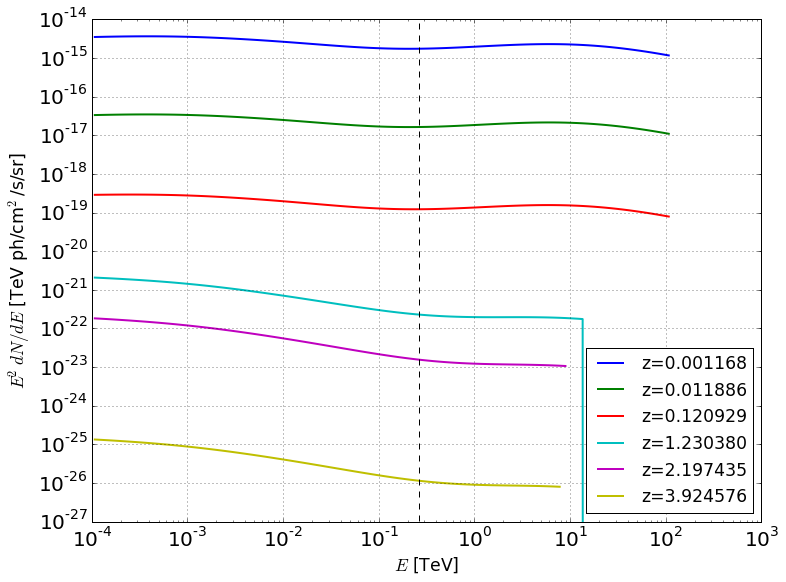

In [27]:
%matplotlib inline 
from numpy import loadtxt, size, arange, nanmin, where, nansum
from matplotlib.pyplot import plot, matshow, figure, show
from matplotlib.colors import LogNorm
from src.analytic import Ethreshold_gg

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

mat = loadtxt("Results/EmissMatrix__PLE_Paper_10TeV.txt",unpack=True)

E = mat[1:,0] # MeV
z = mat[0,1:]
Emiss = mat[1:,1:] # MeV
i_min=min(where(E>Ethreshold_gg()*1e-3)[0])

#mins=nanmin(Emiss,1)
#Emiss /= Emiss[i_min,27]#min(mins[mins!=0])

fig = figure(figsize=(12,9))
ax = fig.add_subplot(111)
for i in [0,8,16,24,26,28]:#arange(0,shape(z)[0],4):
   ax.plot(E*1e-6,E**2*Emiss[:,i]*1e-6,linewidth=2,label="z=%f"%z[i])

#ax.axhline(y=1, xmin=1e-4,xmax=1e3,color='k')
ax.axvline(x=Ethreshold_gg()*1e-3, ymin=1e-3,ymax=1e9,color='k',linestyle="--")

ax.legend(loc="best",fontsize="xx-large")
ax.set_xlabel("$E$ [TeV]",fontsize="xx-large")
ax.set_ylabel("$E^2 dN/dE$ [TeV ph/cm$^2$/s/sr]",fontsize="xx-large")
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')

print "Emin: \t", E[Emiss[:,i]==max(Emiss[:,i])][0]*1e-6, "TeV"
print "redshift\t Emax (TeV)" 
for i in range(size(z)):
   print z[i]," \t", E[Emiss[:,i]==min(Emiss[:,i])][0]*1e-6